In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import product
import numba

In [167]:
def peak_grid(zero, v1, v2, xes, yes, delta):
    zero = np.array(zero)
    v1 = np.array(v1)
    v2 = np.array(v2)
    coords = map(lambda pair: zero + v1*pair[0] + v2*pair[1] + delta*np.random.randn(2) , product(xes, yes))
    return coords


def ring_filter(center, r1, r2):
    center = np.array(center)
    def f(pair):
        d = np.linalg.norm(center - pair)
        return (d > r1) and (d < r2)
    
    return f

In [184]:
coords_1 = peak_grid((0,0), (0.7, 0.39), (0.7, -0.39), np.arange(-5, 5), np.arange(-5, 5), 0.01)
coords_1 = filter(ring_filter((0,0), 0, 3), coords_1)
coords_1 = np.array(list(coords_1)).T

coords_2 = peak_grid((0,0), (0.6, 0.4), (0.3, -0.8), np.arange(-5, 5), np.arange(-5, 5), 0.01)
coords_2 = filter(ring_filter((3,3), 3, 5), coords_2)
coords_2 = filter(ring_filter((0,0), 0, 2.5), coords_2)
coords_2 = np.array(list(coords_2)).T

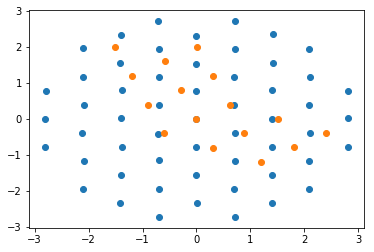

In [185]:
fig, axes = plt.subplots()
axes.scatter(coords_1[0], coords_1[1])
axes.scatter(coords_2[0], coords_2[1])

In [199]:
coords = np.concatenate((coords_1, coords_2), axis=1)

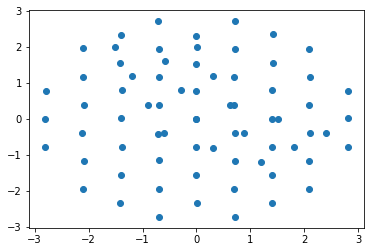

In [200]:
fig, axes = plt.subplots()
axes.scatter(coords[0], coords[1])